# CEGE0004: Assignment 1

# Instance-based Learning

In this notebook we will implement the Instance-based Learning in scikit-learn and predict the default of credit card client.

## The Dataset

I am working with the default of credit card clients Data Set from UCI Machine Learning Repository, to classify and predict customer defaults. The link of dataset is shown below:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The dataset employes a binary variable, default (Yes = 1, No = 0), as the response variable. At the same time, the following 23 variables are used as explanatory variables:

X1: Amount of the given credit: it includes both the individual consumer credit and his/her family credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment from April to September. (e.g. X6 = the repayment status in September; X7 = the repayment status in August; . . .) The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; . . .; 9 = payment delay for nine months and above.

X12 - X17: Amount of bill statement. (e.g. X12 = amount of bill statement in September; X13 = amount of bill statement in August; . . .).

X18 - X23: Amount of previous payment. (e.g. X18 = amount paid in September; X19 = amount paid in August, 2005; . . .).

## Import the required packages and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

Convert y_train and y_test from multi-dimensional array into one-dimensional array.

In [3]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Define the accuracy measure
Accuracy is equal to the proportion of examples that the classifier predicted correctly

In [4]:
def accuracy(ys, ys_hat):
    res = 0
    for y, y_hat in zip(ys, ys_hat):
        if y == y_hat:
            res += 1
    res /= len(ys)
    return res

## kNN in Scikit-Learn

Then use the kNN implementation of scikit-learn.

Import the packages needed and  creates an instance of the KNeighborsClassifier class from the sklearn.neighbors module.
KNeighborsClassifier works by finding the k-nearest neighbors of a given data point in the feature space, and assigning it to the class that is most common among its neighbors. 

Firstly let's try the number of neighbors is 3 and use 'euclidean' as distance metric.

In [5]:
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

Train the model

In [6]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Evaluate the result of this classifier. 

In [7]:
y_test_pred = knn_clf.predict(x_test)
print('Test accuracy of kNN', accuracy_score(y_test, y_test_pred))

Test accuracy of kNN 0.744


The accuracy is not very good. Try to fit another model with the hype parameters of n_neighbors=4, metric='cosine'

In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=4, metric='cosine')
knn_clf.fit(x_train, y_train)
y_test_pred = knn_clf.predict(x_test)
print('Test accuracy of kNN', accuracy_score(y_test, y_test_pred))

Test accuracy of kNN 0.7906666666666666


This accuracy is relatively higher

To further find the best hype parameters and perform cross-validation for the dataset, we will use GridsearchCV

# GridsearchCV: Find the best hyper-parameters and perform cross-validation
To find these hyper-parameter values we can exploit the grid search of scikit-learn. Then we could see the best hyper-parameter values found by the cross-validation.

First try to find the best parameter in range(1,11) for n_neighbors

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ["uniform", "distance"],
    'n_neighbors': range(1, 11),
    'metric':['euclidean', 'manhattan', 'cosine']}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=2, we

[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.9s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.9s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.9s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.9s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.8s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.8s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.8s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.9s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.6s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.3s
[CV] END ...metric=manhattan

[CV] END ......metric=cosine, n_neighbors=1, weights=uniform; total time=   1.2s
[CV] END ......metric=cosine, n_neighbors=1, weights=uniform; total time=   1.1s
[CV] END .....metric=cosine, n_neighbors=1, weights=distance; total time=   1.2s
[CV] END .....metric=cosine, n_neighbors=1, weights=distance; total time=   1.1s
[CV] END .....metric=cosine, n_neighbors=1, weights=distance; total time=   1.2s
[CV] END .....metric=cosine, n_neighbors=1, weights=distance; total time=   1.2s
[CV] END .....metric=cosine, n_neighbors=1, weights=distance; total time=   1.2s
[CV] END ......metric=cosine, n_neighbors=2, weights=uniform; total time=   1.2s
[CV] END ......metric=cosine, n_neighbors=2, weights=uniform; total time=   1.3s
[CV] END ......metric=cosine, n_neighbors=2, weights=uniform; total time=   1.3s
[CV] END ......metric=cosine, n_neighbors=2, weights=uniform; total time=   1.2s
[CV] END ......metric=cosine, n_neighbors=2, weights=uniform; total time=   1.2s
[CV] END .....metric=cosine,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'cosine'],
                          'n_neighbors': range(1, 11),
                          'weights': ['uniform', 'distance']}],
             verbose=2)

Then we get the best hyper-parameter values found by the cross-validation.

In [10]:
grid_search.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=10)

Try this hyper-parameters on the test set.

In [11]:
knn_clf = KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='uniform')
knn_clf.fit(x_train, y_train)
y_train_pred = knn_clf.predict(x_train)
y_test_pred = knn_clf.predict(x_test)
print('Train accuracy of kNN', accuracy(y_train, y_train_pred))
print('Test accuracy of kNN', accuracy(y_test, y_test_pred))

Train accuracy of kNN 0.8037083333333334
Test accuracy of kNN 0.7941666666666667


The accuracy is slightly improved. 
## However, the hype parameter found lies at the boundary, which means that a more suitable hype parameter may exist

Therefore, we try to find the hyper-parameter in range (8,25) where involved 10

In [12]:
param_grid = [{
    'weights': ["uniform", "distance"],
    'n_neighbors': range(8, 25),
    'metric':['euclidean', 'manhattan', 'cosine']}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 102 candidates, totalling 510 fits
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=9, w

[CV] END ..metric=euclidean, n_neighbors=18, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=18, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=18, weights=uniform; total time=   0.1s
[CV] END .metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=19, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=19, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=19, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=19, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean,

[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.3s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, 

[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=21, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=22, weights=uniform; total time=   0.3s
[CV] END .metric=manhattan, n_neighbors=22, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=22, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, n_neighbors=22, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, 

[CV] END ....metric=cosine, n_neighbors=14, weights=distance; total time=   1.8s
[CV] END ....metric=cosine, n_neighbors=14, weights=distance; total time=   1.8s
[CV] END .....metric=cosine, n_neighbors=15, weights=uniform; total time=   1.6s
[CV] END .....metric=cosine, n_neighbors=15, weights=uniform; total time=   1.7s
[CV] END .....metric=cosine, n_neighbors=15, weights=uniform; total time=   1.7s
[CV] END .....metric=cosine, n_neighbors=15, weights=uniform; total time=   1.8s
[CV] END .....metric=cosine, n_neighbors=15, weights=uniform; total time=   1.8s
[CV] END ....metric=cosine, n_neighbors=15, weights=distance; total time=   1.6s
[CV] END ....metric=cosine, n_neighbors=15, weights=distance; total time=   1.6s
[CV] END ....metric=cosine, n_neighbors=15, weights=distance; total time=   1.7s
[CV] END ....metric=cosine, n_neighbors=15, weights=distance; total time=   1.7s
[CV] END ....metric=cosine, n_neighbors=15, weights=distance; total time=   1.8s
[CV] END .....metric=cosine,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'cosine'],
                          'n_neighbors': range(8, 25),
                          'weights': ['uniform', 'distance']}],
             verbose=2)

In [13]:
grid_search.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=19)

### This time the best hype parameter for n_neighbors is 19, which is not a boundary value for the range. We make sure that this is the best hype parameter

Fit the model with the best hype parameters where the weights is the default value 'uniform'

In [14]:
knn_clf = KNeighborsClassifier(metric='cosine', n_neighbors=19, weights='uniform')
knn_clf.fit(x_train, y_train)
y_train_pred = knn_clf.predict(x_train)
y_test_pred = knn_clf.predict(x_test)
print('Train accuracy of kNN', accuracy(y_train, y_train_pred))
print('Test accuracy of kNN', accuracy(y_test, y_test_pred))

Train accuracy of kNN 0.7985416666666667
Test accuracy of kNN 0.7945


### Next, let us plot the performance of different models to directly show the comparison

### It is noted that after selecting the best hype parameters by using GridsearchCV, the accuracy is improved slightly

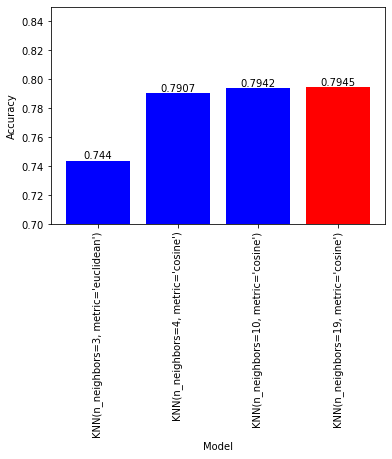

In [15]:
import matplotlib.pyplot as plt
import numpy as np
models = np.array(['KNN(n_neighbors=3, metric=\'euclidean\')',
                   'KNN(n_neighbors=4, metric=\'cosine\')',
                   'KNN(n_neighbors=10, metric=\'cosine\')',
                   'KNN(n_neighbors=19, metric=\'cosine\')'])
accuracy = np.array([0.744,0.7907,0.7942,0.7945])
colors = ['b', 'b', 'b', 'r']
plt.bar(models, accuracy, color=colors)
plt.xticks(np.arange(len(models)), models,rotation=90)
plt.ylim(0.70, 0.85)
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracy):
    plt.text(i, v+0.001, str(v), ha='center', fontsize=10)
plt.show()

### In conclusion, we find the best model, KNN(n_neighbors=19, metric='cosine'), with the best accuracy by using the GridsearchCV, which helps us to find the best hype parameter and perform cross validation

# Save KNN model for future use

By saving the KNN model to a file, we can reuse it later to make predictions on new, unseen data without having to retrain the model from scratch.

In [16]:
import pickle
with open("Instance_based.sav", "wb") as f:
    pickle.dump(knn_clf, f)
    f.close()